In [1]:
import tensorflow.keras.datasets as ds

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

(x_train,y_train),(x_test,y_test)=ds.cifar10.load_data()

x_train=x_train.astype('float32'); x_train/=255

x_train=x_train[0:15,]; y_train=y_train[0:15,]    

class_names=['airplane','automobile','bird','cat','deer','dog','flog','horse','ship','truck']

170498071/170498071 [==============================] - 24s 0us/step


C:\Users\user\AppData\Local\Temp\ipykernel_28660\1441545884.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(y_train[i])])


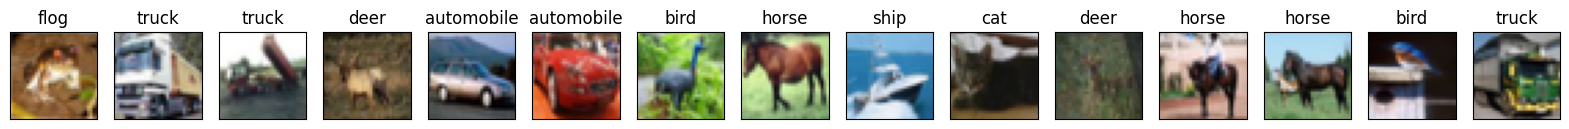

In [2]:
plt.figure(figsize=(20,2))

for i in range(15):

    plt.subplot(1,15,i+1)

    plt.imshow(x_train[i])

    plt.xticks([]); plt.yticks([])

    plt.title(class_names[int(y_train[i])])

plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_28660\1649529634.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(label[i])])


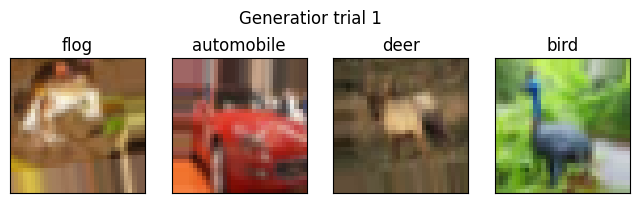

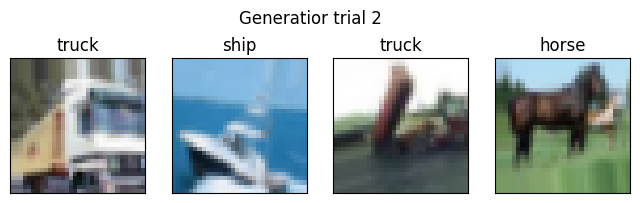

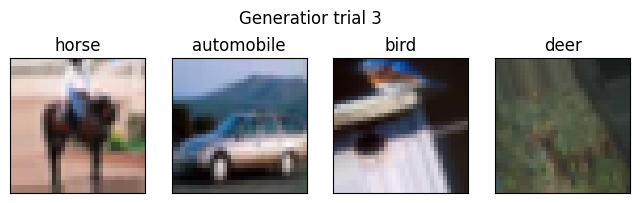

In [3]:
batch_size=4

# rotation_range 각도 범위 내에서 회전

generator=ImageDataGenerator(rotation_range=20.0,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True)

gen=generator.flow(x_train,y_train,batch_size=batch_size)

for a in range(3):

    img,label=gen.next()    # batch size만큼 생성

    plt.figure(figsize=(8,2.4))

    plt.suptitle("Generatior trial "+str(a+1))

    for i in range(batch_size):

        plt.subplot(1,batch_size,i+1)

        plt.imshow(img[i])

        plt.xticks([]); plt.yticks([])

        plt.title(class_names[int(label[i])])

    plt.show()

In [4]:
#5flowers
CLASS_NAMES = ['daisy','dandelion','roses','sunflowers', 'tulips']

CLASS_NAMES

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

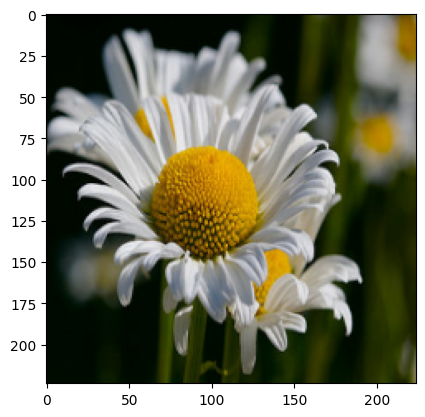

In [5]:
import tensorflow as tf

import matplotlib.pyplot as plt

IMG_HEIGHT = 224

IMG_WIDTH = 224

IMG_CHANNELS = 3

def read_and_decode(filename, reshape_dims):

  img = tf.io.read_file(filename)

  # jpeg 포맷을 픽셀 데이터로 변환

  img = tf.image.decode_jpeg(img, channels=IMG_CHANNELS)

  # 0~255 => 0~1 정규화

  img = tf.image.convert_image_dtype(img, tf.float32)

  return tf.image.resize(img, reshape_dims)

def show_image(filename):

  img = read_and_decode(filename, [IMG_HEIGHT, IMG_WIDTH])

  plt.imshow((img.numpy()))

show_image("c:/data/flowers/daisy/754296579_30a9ae018c_n.jpg")

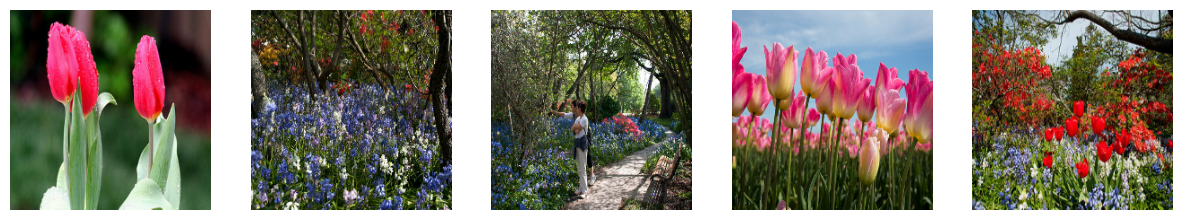

In [6]:
tulips = tf.io.gfile.glob("c:/data/flowers/tulips/*.jpg")

f, ax = plt.subplots(1, 5, figsize=(15,15))

for idx, filename in enumerate(tulips[:5]):

  img = read_and_decode(filename, [IMG_HEIGHT, IMG_WIDTH])

  ax[idx].imshow((img.numpy()))

  ax[idx].axis('off')

In [7]:
# label을 추가한 함수

def decode_csv(csv_row):

  record_defaults = ["path", "flower"]

  filename, label_string = tf.io.decode_csv(csv_row, record_defaults)

  img = read_and_decode(filename, [IMG_HEIGHT, IMG_WIDTH])

  label = tf.argmax(tf.math.equal(CLASS_NAMES, label_string))

  return img, label

# Dataset.map(f) : 함수 f를 입력 데이터셋의 각 요소에 적용하여 새로운 데이터셋을 생성

train_dataset = (tf.data.TextLineDataset("c:/data/flowers/train_set.csv").map(decode_csv)).take(800).batch(32)

eval_dataset = (tf.data.TextLineDataset("c:/data/flowers/eval_set.csv").map(decode_csv)).take(200).batch(32)

In [8]:
from tensorflow.keras import Sequential

from tensorflow.keras.layers import Flatten, Dense

from tensorflow.keras.losses import SparseCategoricalCrossentropy



model = tf.keras.Sequential([

              Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)),

              Dense(len(CLASS_NAMES), activation='softmax')

])

# from_logits=False 소프트맥스를 사용하지 않는 경우

model.compile(optimizer='adam',

              loss=SparseCategoricalCrossentropy(from_logits=False),

              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 5)                 752645    
                                                                 
Total params: 752,645
Trainable params: 752,645
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(train_dataset, validation_data=eval_dataset, epochs=20)

Epoch 1/20


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc1 in position 144: invalid start byte